In [5]:
# import numpy as np

from dataset_coroutine import dataset_coroutine
from build_image_hist import get_color_histograms_of_images

In [1]:
link_1 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2021 год, Южно-Камчатский заказник, Охотоморское побережье (1)/'
         
link_2 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2021 год, Южно-Камчатский заказник, Охотоморское побережье (1)/участок на 4 речке'
         
link_3 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' + \
         '2021 год, Южно-Камчатский заказник, Охотоморское побережье (2)/'

link_4 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2023 год лето, Южно-Камчатский заказник, Охотоморское побережье/1 km'
         
link_5 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2023 год осень, сопредельная с Южно-Камчатским заказником территория, Охотоморское побережье/' +\
         'от 1 речки в сторону поселка'

link_6 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2023 год осень, сопредельная с Южно-Камчатским заказником территория, Охотоморское побережье/' +\
         'участок ближе к поселку'
         
link_7 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         'P010_Okhotskoe_more_19_07_2020/' +\
         'Photo'

In [2]:
import pickle

file_name = './umap.file'
reducer = pickle.load((open(file_name, 'rb')))

2024-04-05 18:46:23.065288: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-05 18:46:23.113006: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 18:46:23.906900: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
import numpy as np

data_cor = dataset_coroutine(
    [link_1, link_2, link_3, link_4, link_5, link_6, link_7], 
    each_n=10000, 
    total_n=np.inf
)

hists = get_color_histograms_of_images(data_cor)

odc_number:  10000
odc_number:  10000
odc_number:  10000
odc_number:  10000
odc_number:  10000
odc_number:  10000
odc_number:  10000
total_number:  70000


In [13]:
umap_probs = reducer.transform(hists).T

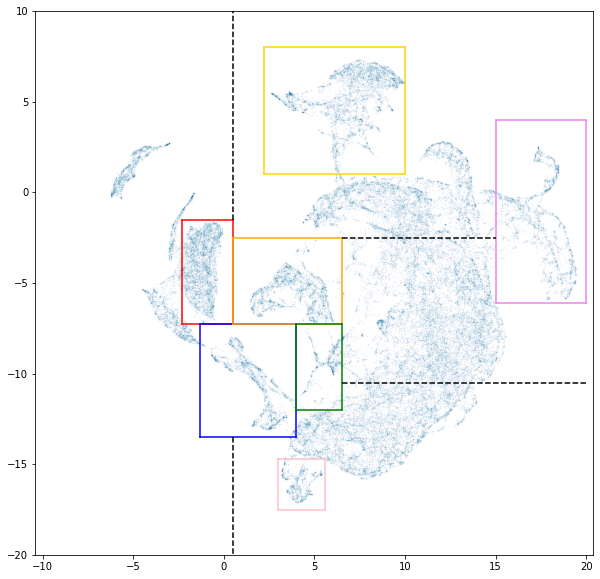

In [86]:
import matplotlib.pyplot as plt

def draw_box(box, color):
    plt.plot([box['l'], box['r']], [box['d'], box['d']], color=color)
    plt.plot([box['l'], box['r']], [box['u'], box['u']], color=color)
    plt.plot([box['l'], box['l']], [box['d'], box['u']], color=color)
    plt.plot([box['r'], box['r']], [box['d'], box['u']], color=color)


plt.figure(figsize=(10, 10))
plt.scatter(umap_probs[0], -umap_probs[1], alpha=0.1, s=0.1);

box_1 = {'l':-2.3, 'r':0.5, 'd':-7.25, 'u':-1.5}
draw_box(box_1, color='red')

box_2 = {'l':-1.3, 'r':4, 'd':-13.5, 'u':-7.25}
draw_box(box_2, color='blue')

box_3 = {'l':0.5, 'r':6.5, 'd':-7.25, 'u':-2.5}
draw_box(box_3, color='orange')

box_4 = {'l':4, 'r':6.5, 'd':-12, 'u':-7.25}
draw_box(box_4, color='green')

box_5 = {'l':3, 'r':5.6, 'd':-17.5, 'u':-14.7}
draw_box(box_5, color='pink')

box_6 = {'l':15, 'r':20, 'd':-6.1, 'u':4}
draw_box(box_6, color='violet')

box_7 = {'l':2.2, 'r':10, 'd':1, 'u':8}
draw_box(box_7, color='gold')

plt.plot([6.5, 15], [-2.5, -2.5], color='black', linestyle='--')
plt.plot([6.5, 20], [-10.5, -10.5], color='black', linestyle='--')

plt.plot([0.5, 0.5], [-1.5, 10], color='black', linestyle='--')
plt.plot([0.5, 0.5], [-13.5, -20], color='black', linestyle='--')

plt.axis('equal');
plt.xlim([-10, 20])
plt.ylim([-20, 10])

# plt.savefig('./umap_labels_with_black.png');